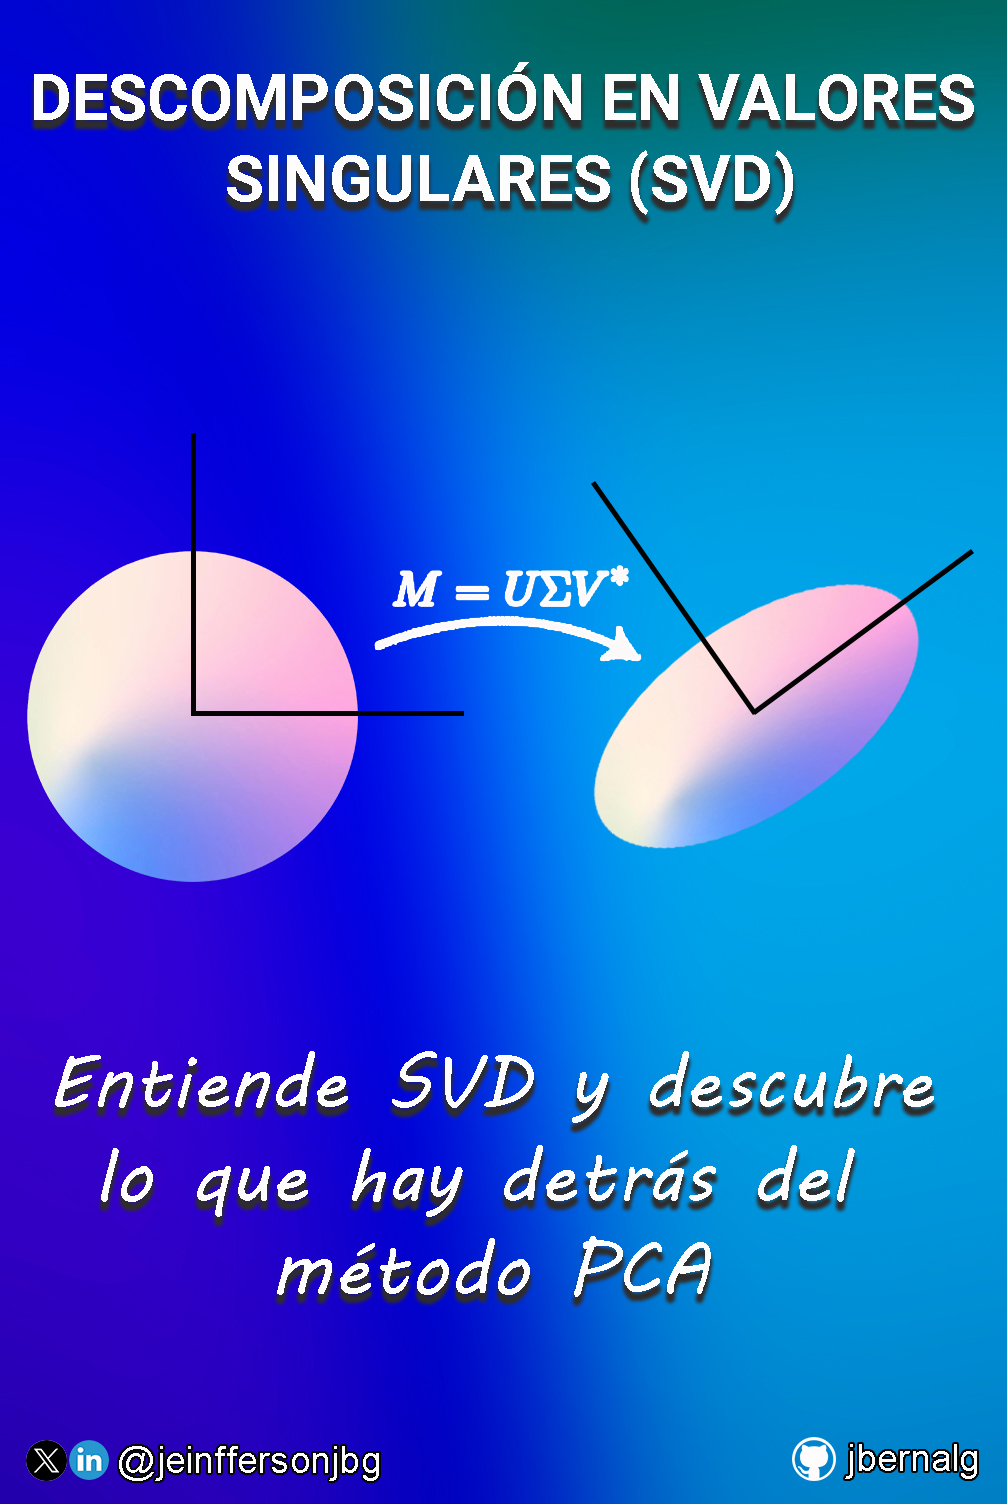

# __Descomposición en Valores Singulares (SVD)__

Es un método fundamental en el álgebra lineal que busca descomponer una matriz en otras matrices. Esta íntimamente relacionado con el hecho de diagonalizar una matriz simétrica. Su objetivo es obtener, a partir de la descomposición de matrices, la mejor aproximación de la matriz de datos inicial almacenando la menor cantidad de datos posibles.

Ejemplo, si contamos con un set de datos de 50 features, lo que se busca es con menos cantidad de features representar lo mejor posible los datos.

Es ampliamente utilizado en Machine Learning para la reducción de dimensionalidad, compresión de datos, procesamiento de imágenes y recomendadores.

## Cómo se calcula?

Supongamos que la matriz de datos original que deseamos descomponer es $M$ la cual puede ser rectangular $mxn$. Vamos a aprender cómo hacer la descomposición de la matriz mediante la siguiente visualización:

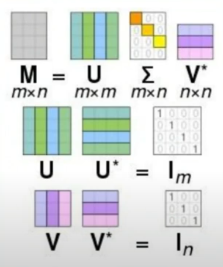

El método consiste en representar la matriz $M$ en las matrices $U$, $\Sigma$ y $V$, donde:

- $U$ es la matriz de vectores singulares que forman la base del espacio de $M$.

- Sigma ($\Sigma$) es una matriz diagonal cuyos valores son llamados valores singulares. Se calculan como la raíz cuadrada de los autovalores de $M$ traspuesto por $M$, ordenados decrecientemente. Representan la energía de cada componente de la descomposición.

- $V$ son los vectores singulares de $M$ traspuesto por $M$. Forman la base del espacio de los valores singulares.

A nivel espacial, $SVD$ descompone la matriz $M$ en rotaciones ($U$ y $V$) y escalados ($\Sigma$). Es decir, lleva los datos de su forma original a una forma a la que aplica dos rotaciones y un escalado bien sea de compresión o expansión.

## Obtener $SVD$ de forma práctica

In [1]:
# librerias
import matplotlib.pyplot as plt
import numpy as np
import time
from numpy.linalg import svd # metodo svd

Vamos a crear una función que nos permita visualizar paso a paso la descomposición $SVD$ de una matriz $A$ que representa una imágen, mostrando su reconstrucción progresiva usando los valores singulares.

In [2]:
vmin = 0
vmax = 1
image_bias = 1

def plot_svd(A):

    # longitud de A
    n=len(A)
    plt.imshow(image_bias-A, cmap='gray', vmin=vmin, vmax=vmax)
    print('Imagen formada con la matriz de datos')
    plt.show()

    U, S, V = svd(A)
    print('Matriz U: \n \n', U,'\n \n')
    print('Matriz Sigma: \n \n', S,'\n \n')
    print('Matriz V: \n \n', V,'\n \n')

    imgs = []
    for i in range(n):
        imgs.append(S[i]*np.outer(U[:,i],V[i]))

    combined_imgs = []
    for i in range(n):
        img = sum(imgs[:i+1])
        combined_imgs.append(img)

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
        ax.set_title(np.round(S[num],2), fontsize=60)
    plt.show()

    fig, axes = plt.subplots(figsize=(n*n, n), nrows=1, ncols=n, sharex=True, sharey=True)
    for num, ax in zip(range(n), axes):
        ax.imshow(image_bias*combined_imgs[num], cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()

    return U, S, V



La matriz que vamos a utilizar, corresponde a la visualización de un corazón formado por valores binarios.

In [3]:
D = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0]
              ])

Pasamos la matriz $D$ a la función creada y le asignamos el resultados a 3 variables que serán las matrices de descompocisión $U$, $S$ y $V$

Imagen formada con la matriz de datos


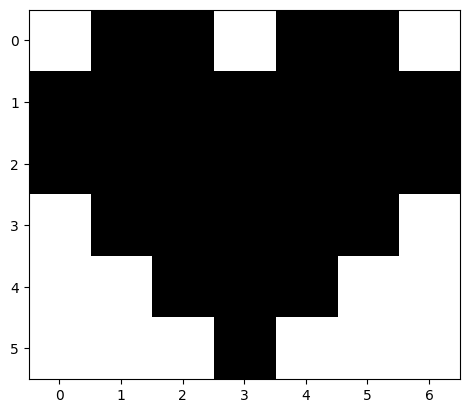

Matriz U: 
 
 [[ 3.61249460e-01 -4.38468638e-16  7.30296743e-01 -5.32180543e-02
  -2.63150853e-01  5.13891975e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
   6.29386561e-01  3.22292657e-01]
 [ 5.41874189e-01  3.53553391e-01 -2.73861279e-01 -7.98270815e-02
  -6.29386561e-01 -3.22292657e-01]
 [ 4.45394592e-01 -3.53553391e-01  2.73861279e-01  5.17967494e-01
   2.63150853e-01 -5.13891975e-01]
 [ 2.77104327e-01 -7.07106781e-01 -1.82574186e-01 -6.24403602e-01
   2.49800181e-16  1.62196645e-16]
 [ 8.41451321e-02 -3.53553391e-01 -4.56435465e-01  5.71185548e-01
  -2.63150853e-01  5.13891975e-01]] 
 

Matriz Sigma: 
 
 [4.73981604e+00 1.41421356e+00 1.41421356e+00 7.30851490e-01
 1.49190666e-16 1.82188799e-17] 
 

Matriz V: 
 
 [[ 2.28647772e-01  3.98832447e-01  4.57295545e-01  3.98832447e-01
   4.57295545e-01  3.98832447e-01  2.28647772e-01]
 [ 5.00000000e-01  2.50000000e-01 -2.50000000e-01 -5.00000000e-01
  -2.50000000e-01  2.50000000e-01  5.00000000e-01]
 [-3.8729833

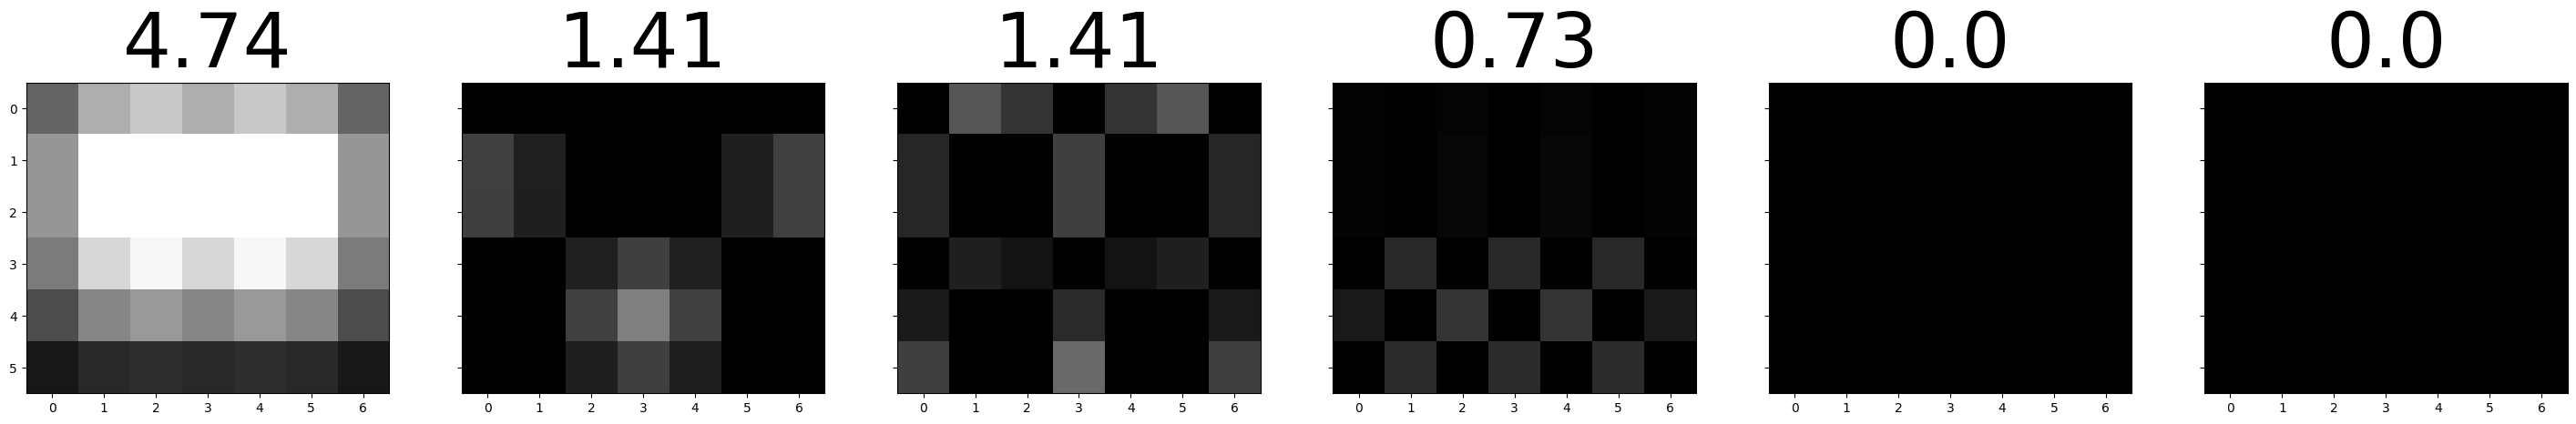

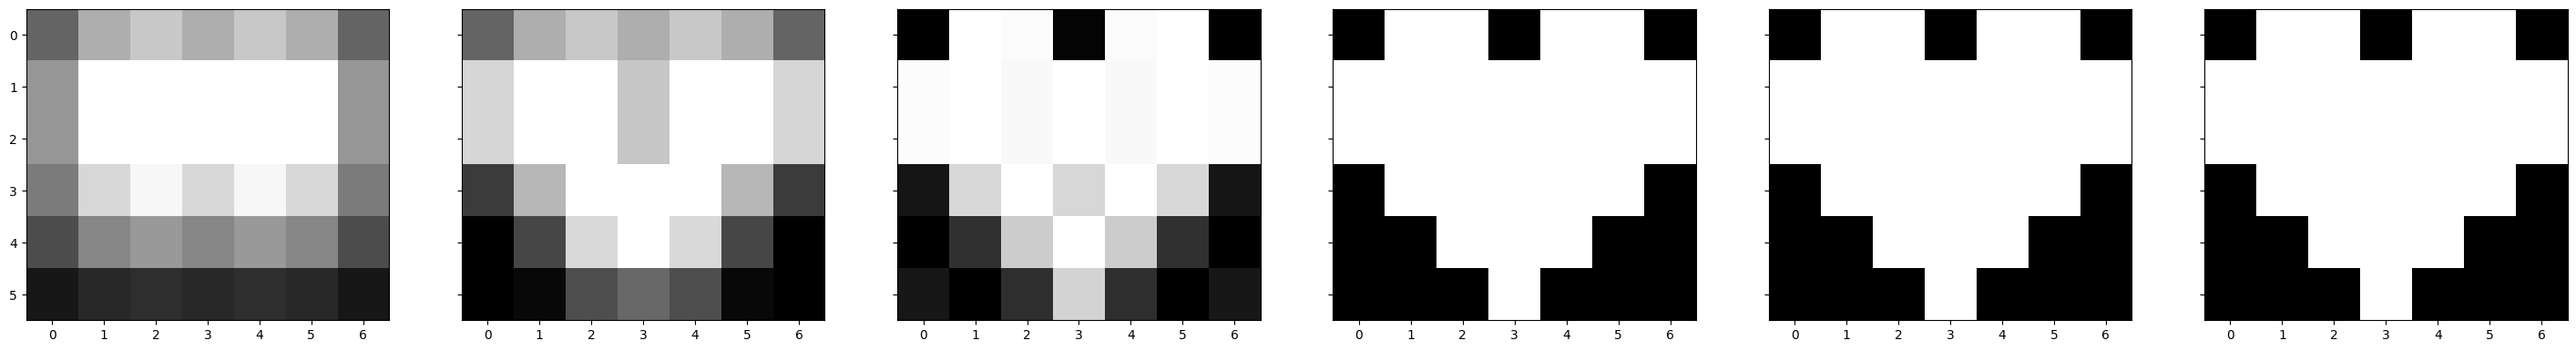

In [4]:
U, S, V = plot_svd(D)

> La primera imágen muestra la matriz $A$ graficada, donde verificamos que se trata de un corazón.

> La matriz $S$ sólo nos devuelve un vector con los valores singulares. No nos devuelve la matriz diagonal $\Sigma$ con los demás elementos ceros.

> Al final se muestra la reconstrucción progresiva de la imágen usando los diferentes valores singulares. La primera fila muestra la información que capta cada valor singular. La segunda fila muestra la información acumulada hasta dicho valor singular. 

> Los valores singulares nos indican la información que aporta ese valor singular y los vectores singulares asociados.

> El primer valor singular (4.74) y sus respectivos vectores singulares, recogen una gran cantidad de información de la matriz original aunque poco definida.

> El segundo valor singular (1.41) individualmente, capta menos información que el primero, pero si nos quedamos con los dos primeros valores singulares, lo que implica pasar de 6 dimensiones a 2, obtenemos una mayor cantidad de información de la matriz original y ya podemos inferir visualmente que se trata de un corazón.

> Si tomamos los tres primeros valores singulares, lo que implica pasar de 6 a 3 dimensiones, la información capturada muestra claramente que se trata de un corazón aunque no se ve del todo definido.

> Si tomamos los 4 primeros valores singulares, ya vemos definidamente que se trata de un corazón. Puede que se pierda alguna información pero no es relevante para la figura mostrada. 

En definitiva, la función $SVD$ nos muestra que podemos seleccionar una cantidad de dimensiones menor a las dimensiones de los datos y al final obtener una aproximación bastante buena a los datos originales.


## Trabajando sobre una imágen en blanco y negro

Vamos a utilizar $SVD$ para realizar una compresión de imágen y mostrar cómo se pierde información a medida que se reducen las dimensiones.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import time
from skimage.io import imread
from numpy.linalg import svd
from matplotlib.pyplot import imshow

from PIL import Image

In [ ]:
# importar imagen y leerla
img = imread('edificio_px.jpg')
img.shape

(188, 336, 3)

> La imágen a utilizar tiene 188 x 336 pixeles

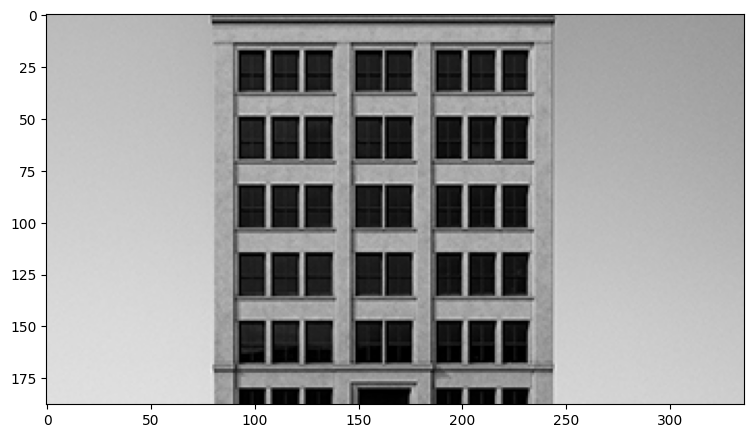

In [ ]:
# abrir imagen con PIL
img = Image.open('edificio_px.jpg')

# convertir imagen en escala de grises
# L: luminancia
# A: canal alfa (transparencia)
imggray = img.convert('LA')

# definir dimensiones de la imagen
x, y = (188, 336)

# crear lienzo
plt.figure(figsize=(9,6))

# mostrar imagen en escala de grises
plt.imshow(imggray)
plt.show()

Vamos a llevar la imágen a una representación matricial con Numpy.

In [8]:
imgmat =np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

imgmat

matrix([[186., 186., 185., ..., 154., 152., 151.],
        [186., 187., 186., ..., 153., 151., 155.],
        [188., 187., 188., ..., 153., 154., 155.],
        ...,
        [222., 224., 225., ..., 207., 204., 205.],
        [222., 221., 224., ..., 206., 203., 205.],
        [223., 221., 223., ..., 205., 205., 206.]], shape=(188, 336))

Para verificar que la matriz '_imgmat_' tiene la información de la imágen, graficamos los datos de la matriz.

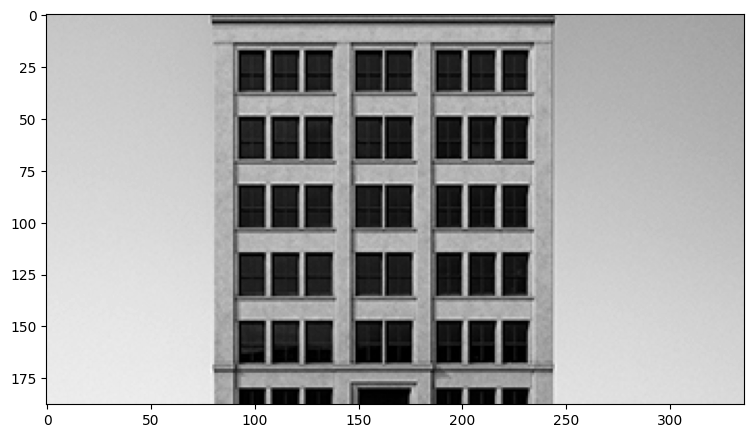

In [9]:
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')
plt.show()

Ahora, aplicamos la descomposición en valores singulares con el método $svd$ de Numpy.

In [10]:
u, s, v = np.linalg.svd(imgmat)

Calculamos la información que aporta cada valor singular.

In [ ]:
# asignar vector con valores singulares a una variable
auto_valores = s

# suma de todos los valores singulares elevados al cuadrado 
info_total = sum(auto_valores**2)

# valores singulares elevados al cuadrado
av_pow = auto_valores**2

# porcentaje de informacion dado por cada valor singular
info_pct = ((av_pow/info_total)*100)

print(info_pct)

[9.46428079e+01 4.85898959e+00 3.00459257e-01 4.12676307e-02
 3.30097983e-02 2.72070849e-02 1.84062379e-02 1.67392031e-02
 9.37905679e-03 7.30499367e-03 6.21433699e-03 3.78798391e-03
 2.03284111e-03 1.69490936e-03 1.61666594e-03 1.50376691e-03
 1.41790341e-03 1.15912381e-03 1.06682388e-03 9.59621188e-04
 9.21177591e-04 8.81345556e-04 8.34251828e-04 7.49367633e-04
 7.31574197e-04 6.82832829e-04 6.71958398e-04 6.06757211e-04
 5.93615716e-04 5.69663199e-04 5.28325702e-04 5.09897915e-04
 4.86026939e-04 4.71953198e-04 4.51697893e-04 4.46206421e-04
 4.23553279e-04 4.05305118e-04 3.95470119e-04 3.83421681e-04
 3.73799044e-04 3.44479812e-04 3.33242530e-04 3.16152124e-04
 3.12785391e-04 3.00913176e-04 2.91144796e-04 2.80559925e-04
 2.66586250e-04 2.63014215e-04 2.55408662e-04 2.42109134e-04
 2.30852698e-04 2.26329651e-04 2.24615568e-04 2.11600546e-04
 2.08054597e-04 2.05769358e-04 1.87609861e-04 1.82639965e-04
 1.81820594e-04 1.75897557e-04 1.71743841e-04 1.62234536e-04
 1.56790207e-04 1.543457

Realizamos el cálculo de cuánta información se va acumulando con cada valor singular.

In [ ]:
acumulated_info = 0

for i in range(len(info_pct)):
    acumulated_info = acumulated_info + info_pct[i]
    print('Número de valor singular ' + str(i+1) + ': ' + str(auto_valores[i]) + ' (' + str(round(acumulated_info, 2)) + '%)')

Numero de valor singular 1: 39918.98776720683 94.64%
Numero de valor singular 2: 9045.002598197316 99.5%
Numero de valor singular 3: 2249.2022359050547 99.8%
Numero de valor singular 4: 833.5669355578008 99.84%
Numero de valor singular 5: 745.5163066858482 99.88%
Numero de valor singular 6: 676.8255078032633 99.9%
Numero de valor singular 7: 556.6961616963539 99.92%
Numero de valor singular 8: 530.8882350591585 99.94%
Numero de valor singular 9: 397.38849976743995 99.95%
Numero de valor singular 10: 350.70796856947527 99.96%
Numero de valor singular 11: 323.46933229504225 99.96%
Numero de valor singular 12: 252.54558139391025 99.97%
Numero de valor singular 13: 185.00668820905705 99.97%
Numero de valor singular 14: 168.93084383362637 99.97%
Numero de valor singular 15: 164.98552998316958 99.97%
Numero de valor singular 16: 159.12044126362048 99.97%
Numero de valor singular 17: 154.5108689919649 99.97%
Numero de valor singular 18: 139.70135728086092 99.97%
Numero de valor singular 19: 1

> La matriz que trabajamos tiene 188 dimensiones, por tanto, se generan 188 valores singulares.

> El primer valor singular aporta el 94.64% de la información total de los datos. Es decir, si sólo nos quedamos con esta dimensión obtendríamos el 94.64% de la información de los datos.

> Si nos quedamos con los 10 primeros valores singulares obtendríamos el 99.96% de la información de los datos.

> Con pasar de 188 a sólo 10 dimensiones obtendríamos casi la totalidad de la información de los datos.

Lo siguiente es realizar un plot de los valores singulares. Esta nos permite visualizar algún posible codo a medida que varía el rango de valores singulares y de esta forma obtener la dimensionalidad intrínseca de los datos.

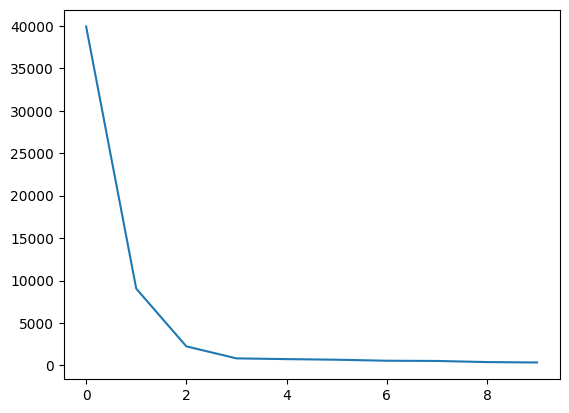

In [17]:
plt.plot(s[:10])
plt.show()

> La gráfica nos muestra que, considerando los 3 primeros valores singulares, obtenemos más del 99% de la información de los datos.

## Reconstruyendo la imágen a partir de los datos reducidos

Vamos a reconstruir la imágen con el primer, segundo y tercer valor singular y visualizar la información que cada uno aporta.

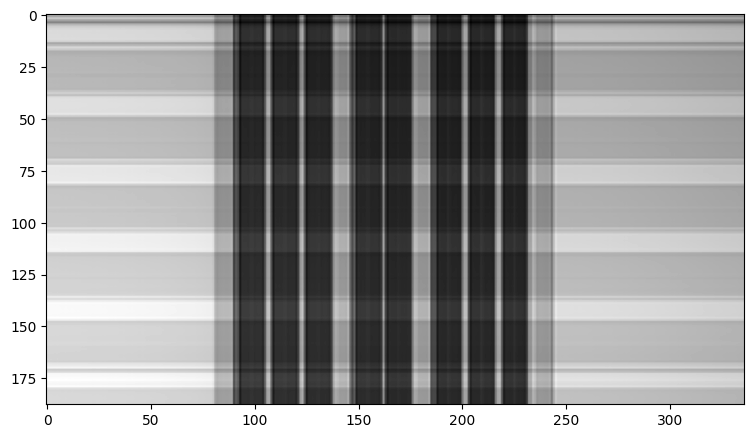

In [ ]:
# considerando el primer valor singular
rencostr_img = np.matrix(u[:, :1])*np.diag(s[:1])*np.matrix(v[:1, :])
plt.figure(figsize=(9,6))
plt.imshow(rencostr_img, cmap='gray')
plt.show()

> Claramente vemos que el primer valor singular capta una gran parte de la información. Podemos ver que se recoje las columnas y líneas de la imágen original

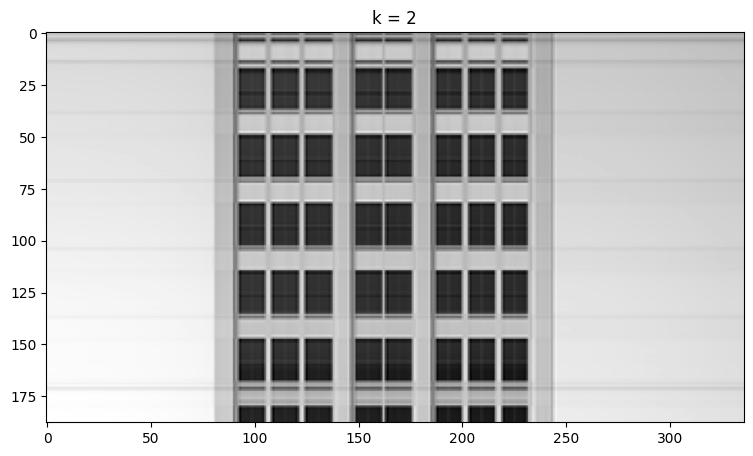

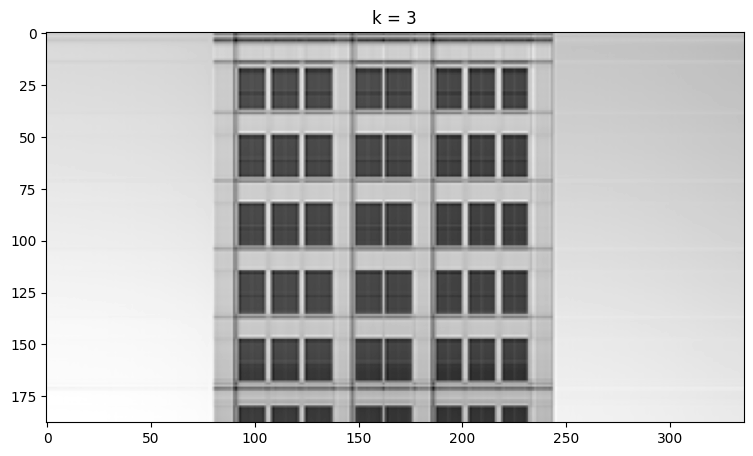

In [20]:
# considerando los dos y tres primero autovalores
for i in range(2,4):
    rencostr_img = np.matrix(u[:, :i])*np.diag(s[:i])*np.matrix(v[:i, :])
    plt.figure(figsize=(9,6))
    plt.imshow(rencostr_img, cmap='gray')
    plt.title('k = ' + str(i))
    plt.show()

> Considerando los 2 primeros valores singulares ya se puede distinguir lo que hay en la imágen.

> Considerando los 3 primeros autovalores se muestran detalles en la imágen.